## Titanic 전처리1

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### train data 

In [2]:
import csv
train = pd.read_csv('train.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.shape

(891, 12)

#### test data

In [6]:
test = pd.read_csv('test.csv')
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test.shape

(418, 11)

In [10]:
# train 결측값
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# test 결측값
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 결측치 처리

Age -> 평균 29.69

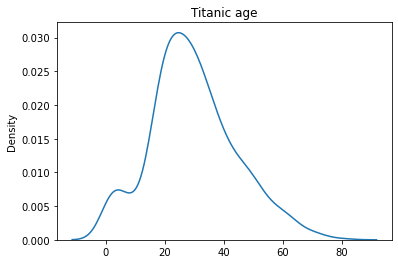

In [12]:
import seaborn as sns

x = train['Age'].values

sns.kdeplot(x)
plt.title('Titanic age')

plt.show()

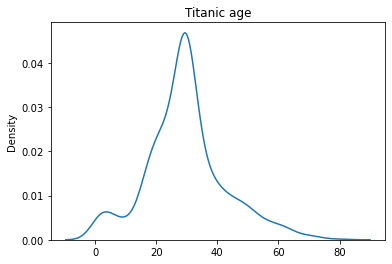

In [14]:
train['Age'] = train['Age'].fillna(29.69)     # train
test['Age'] = test['Age'].fillna(29.69)   # test

Embarked -> 최빈값 S(0)

In [15]:
train['Embarked'] = train['Embarked'].fillna('S')

Fare -> 최빈값 8.05

In [16]:
fare = train['Fare']
fare.mode()

0    8.05
dtype: float64

In [17]:
test['Fare'] = test['Fare'].fillna(8.05)

#### 새 변수 생성

In [18]:
# age_gr / married / f_nm / f_ox 

Age > Age_gr

In [19]:
def age_gr(x):
    if x < 5 :
       return 'very young'
    if 5<=x<10:
       return 'young'
    if 10<=x<16:
       return 'children'
    if 16<=x<20:
       return 's_adult'    # 16세~ 성인 간주 
    if 20<=x<30:
       return '20s'
    if 30<=x<40:
       return '30s'
    if 40<=x<50:
       return '40s'
    if 50<=x<60:
       return '50s'
    if 60<=x<70:
       return '60s'
    if 70<=x<80:
       return '70s'
    if 80<=x<90:
       return '80s'


In [20]:
train['Age_gr'] = train['Age'].apply(lambda x:age_gr(x))
test['Age_gr'] = test['Age'].apply(lambda x:age_gr(x))

f_nm

In [21]:
train['F_nm'] = train['SibSp'] + train['Parch']
test['F_nm'] = test['SibSp'] + test['Parch']

f_ox

In [22]:
def f_ox(x):
    if x == 0:
        return 0
    if x >= 1:
        return 1   

In [23]:
train['F_ox'] = train['F_nm'].apply(lambda x: f_ox(x))
test['F_ox'] = test['F_nm'].apply(lambda x: f_ox(x))

Name > Married

In [24]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,20s,1,1


In [25]:
train['Name'] = train['Name'].str.split(',').str[1]
train['Name'] = train['Name'].str.split('.').str[0]
train['Name'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [26]:
n = [' Don',' Rev', ' Mme',' Mlle', ' Col', ' Capt', ' the Countess', ' Jonkgeer']

for i in n:
    print(train[train['Name']==i]['Name'])


30     Don
Name: Name, dtype: object
149     Rev
150     Rev
249     Rev
626     Rev
848     Rev
886     Rev
Name: Name, dtype: object
369     Mme
Name: Name, dtype: object
641     Mlle
710     Mlle
Name: Name, dtype: object
647     Col
694     Col
Name: Name, dtype: object
745     Capt
Name: Name, dtype: object
759     the Countess
Name: Name, dtype: object
Series([], Name: Name, dtype: object)


In [27]:
condition = train['Name']==' Rev'
train[condition]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox
149,150,0,2,Rev,male,42.0,0,0,244310,13.000,NaN,S,40s,0,0
150,151,0,2,Rev,male,51.0,0,0,S.O.P. 1166,12.525,NaN,S,50s,0,0
249,250,0,2,Rev,male,54.0,1,0,244252,26.000,NaN,S,50s,1,1
626,627,0,2,Rev,male,57.0,0,0,219533,12.350,NaN,Q,50s,0,0
848,849,0,2,Rev,male,28.0,0,1,248727,33.000,NaN,S,20s,1,1
886,887,0,2,Rev,male,27.0,0,0,211536,13.000,NaN,S,20s,0,0


In [28]:
# 미혼(0)
# Miss      미혼
# Master    미혼 남성
# Rev       신부님
# Mlle      미혼여성

# 기혼(1)
# Mr        기혼
# Mrs       기혼

In [29]:
# 불명(9) 
# Don           N
# Mme           N
# Col           N
# Capt          캡틴
# the Countess  백작부인
# Jonkgeer      귀족직함
# Dr            박사
# Ms            기혼여부 상관없이
# Major         군대 직위
# Lady          귀족 출신
# Sir           영국 준남작

In [30]:
test['Name'] = test['Name'].str.split(',').str[1]
test['Name'] = test['Name'].str.split('.').str[0]
test['Name'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

In [31]:
my = [' Mr', ' Mrs']
mn = [' Miss', ' Master', ' Rev', ' Mlle']

train['Married'] = train['Name'].apply(lambda x : 0 if x in my else 1 if x in mn else 9)  
test['Married'] = test['Name'].apply(lambda x : 0 if x in my else 1 if x in mn else 9)      

#### 문자열 -> 숫자형으로 인코딩

In [32]:
# sex / embarked / age_gr

train['Sex'] = LabelEncoder().fit_transform(train.Sex)
test['Sex'] = LabelEncoder().fit_transform(test.Sex)

train['Embarked'] = LabelEncoder().fit_transform(train.Embarked)
test['Embarked'] = LabelEncoder().fit_transform(test.Embarked)

train['Age_gr'] = LabelEncoder().fit_transform(train.Age_gr)
test['Age_gr'] = LabelEncoder().fit_transform(test.Age_gr)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox,Married
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,1,1,0
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,0,1,1,1,0
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,0,0,1
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,2,1,1,1,0
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,2,1,0,0,0


#### 필요없는 변수 drop

In [33]:
# cabin, ticket / Name, Age, SibSp, Parch

train = train.drop(['PassengerId', 'SibSp', 'Parch', 'Cabin', 'Ticket', 'Name','Age'], axis=1)
test = test.drop(['Cabin', 'SibSp', 'Parch', 'Ticket','Name', 'Age'], axis=1)

In [34]:
train.head()

,Survived,Pclass,Sex,Fare,Embarked,Age_gr,F_nm,F_ox,Married
0,0,3,1,7.2500,2,0,1,1,0
1,1,1,0,71.2833,0,1,1,1,0
2,1,3,0,7.9250,2,0,0,0,1
3,1,1,0,53.1000,2,1,1,1,0
4,0,3,1,8.0500,2,1,0,0,0


In [35]:
test.head()

,PassengerId,Pclass,Sex,Fare,Embarked,Age_gr,F_nm,F_ox,Married
0,892,3,1,7.8292,1,1,0,0,0
1,893,3,0,7.0000,2,2,1,1,0
2,894,2,1,9.6875,1,4,0,0,0
3,895,3,1,8.6625,2,0,0,0,0
4,896,3,0,12.2875,2,0,2,1,0


In [36]:
# sns.pairplot(train,diag_kind='hist')
# plt.show()

C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


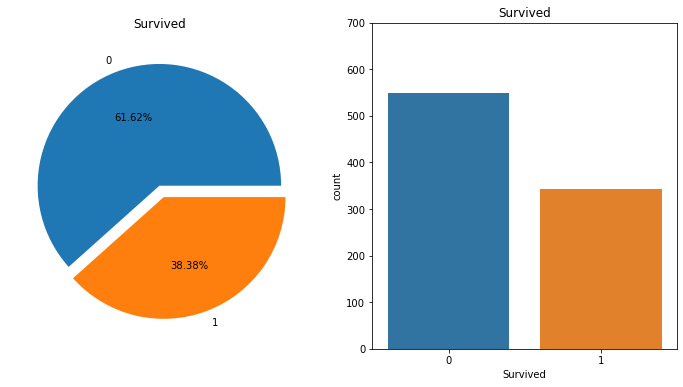

In [37]:
f,ax=plt.subplots(1,2,figsize=(12,6))

train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.ylim(0,700)
plt.show()

[Text(0.5, 1.0, 'Married')]

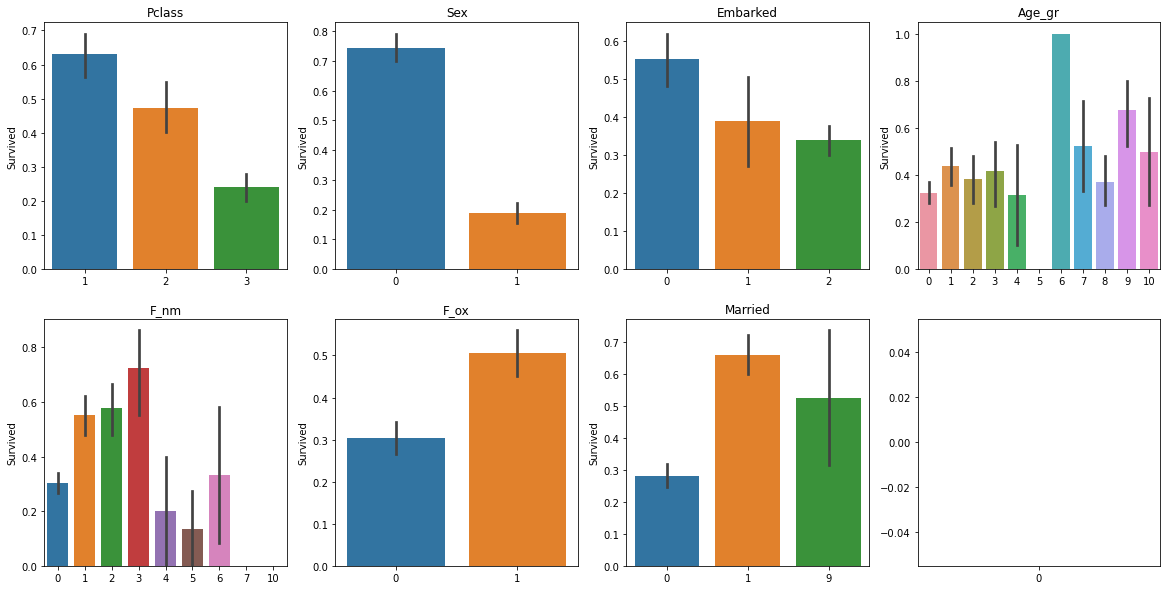

In [38]:
# 변수별 평균 생존률

fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4)
fig.set_size_inches(20,10)

sns.barplot(x='Pclass', y='Survived',data= train, ax=ax1)
sns.barplot(x='Sex', y='Survived',data= train, ax=ax2)
sns.barplot(x='Embarked', y='Survived',data= train, ax=ax3)
sns.barplot(x='Age_gr', y='Survived',data= train, ax=ax4)
sns.barplot(x='F_nm', y='Survived',data= train, ax=ax5)
sns.barplot(x='F_ox', y='Survived',data= train, ax=ax6)
sns.barplot(x='Married', y='Survived',data= train, ax=ax7)
sns.barplot(ax=ax8)

ax1.set(xlabel='')
ax2.set(xlabel='')
ax3.set(xlabel='')
ax4.set(xlabel='')
ax5.set(xlabel='')
ax6.set(xlabel='')
ax7.set(xlabel='')

ax1.set(title="Pclass")
ax2.set(title="Sex")
ax3.set(title="Embarked")
ax4.set(title="Age_gr")
ax5.set(title="F_nm")
ax6.set(title="F_ox")
ax7.set(title="Married")

#### 분류 모델

In [39]:
train['Survived'].unique()

array([0, 1], dtype=int64)

train, test split

In [40]:
X = train.iloc[:,1:].values
y = train['Survived']
X.shape, y.shape

((891, 8), (891,))

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=2021)

랜덤포레스트

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=2021)
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2021,
 'verbose': 0,
 'warm_start': False}

In [43]:
params = {
    'max_depth': [4,5,6,7],
    'min_samples_split' : [2,4,5,6,8]
}
# n_estimator = 100

In [44]:
from sklearn.model_selection import GridSearchCV
grid_rfc = GridSearchCV(rfc, param_grid=params, scoring ='accuracy', cv=5 )
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2021),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'min_samples_split': [2, 4, 5, 6, 8]},
             scoring='accuracy')

In [45]:
# 1
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'max_depth': 7, 'min_samples_split': 8}
0.8429132532824598


In [46]:
# 2
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'max_depth': 7, 'min_samples_split': 8}
0.8429132532824598


In [47]:
# 3
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'max_depth': 7, 'min_samples_split': 8}
0.8429132532824598


In [48]:
# 4
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'max_depth': 7, 'min_samples_split': 8}
0.8429132532824598


In [49]:
best_clf = grid_rfc.best_estimator_

In [50]:
pred = best_clf.predict(test.iloc[:,1:])

In [51]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [60]:
print(f'test_size = 0.1')
print(f'max_depth : 10 , min_samples_split = 5')
print(f'예측 성능 0.83017 / 캐글 0.76555')

print()
print()
print(f'test_size = 0.15')
print(f'max_depth : 6 , min_samples_split = 8')
print(f'예측 성능 0.83745 / 캐글 0.77272')

print()
print()
print(f'test_size = 0.15')
print(f'max_depth : 6 , min_samples_split = 3')
print(f'예측 성능 0.8335 / 캐글 0.77511')

print()
print()
print(f'test_size = 0.2')
print(f'max_depth : 8 , min_samples_split = 3')
print(f'예측 성능 0.83149 / 캐글 0.75598')

print()
print()
print(f'test_size = 0.25')
print(f'max_depth : 6 , min_samples_split = 3')
print(f'예측 성능 0.84438 / 캐글 0.77511')

print()
print()
print(f'test_size = 0.25')
print(f'max_depth : 6 , min_samples_split = 4')
print(f'예측 성능 0.83988 / 캐글 0.78229')




test_size = 0.1
max_depth : 10 , min_samples_split = 5
예측 성능 0.83017 / 캐글 0.76555


test_size = 0.15
max_depth : 6 , min_samples_split = 8
예측 성능 0.83745 / 캐글 0.77272


test_size = 0.15
max_depth : 6 , min_samples_split = 3
예측 성능 0.8335 / 캐글 0.77511


test_size = 0.2
max_depth : 8 , min_samples_split = 3
예측 성능 0.83149 / 캐글 0.75598


test_size = 0.25
max_depth : 6 , min_samples_split = 3
예측 성능 0.84438 / 캐글 0.77511


test_size = 0.25
max_depth : 6 , min_samples_split = 4
예측 성능 0.83988 / 캐글 0.78229


+'min_samples_leaf' 

In [ ]:
params = {
    'max_depth': [4,5,6,7],
    'min_samples_leaf' : [2,3,4]
    'min_samples_split' : [2,4,5,6,8]
}
# n_estimator = 100

In [62]:
print(f'test_size = 0.2')
print(f'max_depth : 9 , min_samples_leaf= 2, min_samples_split = 5')
print(f'예측 성능 0.8385 / 캐글 0.77511')

print()
print()
print(f'test_size = 0.25')
print(f'max_depth : 8 , min_samples_leaf= 2, min_samples_split = 5')
print(f'예측 성능 0.84588 / 캐글 0.78229')

test_size = 0.2
max_depth : 9 , min_samples_leaf= 2, min_samples_split = 5
예측 성능 0.8385 / 캐글 0.77511


test_size = 0.25
max_depth : 8 , min_samples_leaf= 2, min_samples_split = 5
예측 성능 0.84588 / 캐글 0.78229


+n_estimators 

In [ ]:
params = {
    'n_estimators': [130],
    'max_depth': [8],
    'min_samples_leaf' :[2],
    'min_samples_split' : [5]
}

In [65]:
print(f'test_size = 0.25')
print(f'n_estimators = 110,120')
print(f'max_depth : 8 , min_samples_leaf= 2, min_samples_split = 5')
print(f'예측 성능 0.84437 / 캐글 0.77751')

print()
print()
print(f'test_size = 0.25')
print(f'n_estimators = 130,140')
print(f'max_depth : 8 , min_samples_leaf= 2, min_samples_split = 5')
print(f'예측 성능 0.84139 / 캐글 0.77272')

test_size = 0.25
n_estimators = 110,120
max_depth : 8 , min_samples_leaf= 2, min_samples_split = 5
예측 성능 0.84437 / 캐글 0.77751


test_size = 0.25
n_estimators = 130,140
max_depth : 8 , min_samples_leaf= 2, min_samples_split = 5
예측 성능 0.84139 / 캐글 0.77272
